In [65]:
import collections
import matplotlib.pyplot as plt
import numpy as np

In [66]:
def get_data(file_name):
    a = open(file_name, 'r')
    train_loss = collections.defaultdict(float)
    train_acc = collections.defaultdict(float)
    val_loss = collections.defaultdict(float)
    val_acc = collections.defaultdict(float)
    test_loss = 0
    test_acc = 0
    count = 0
    for line in a:
        line = line.split()
        if line[1] == 'train':
            train_loss[int(line[0])] += float(line[2])
            train_acc[int(line[0])] += float(line[3])
        elif line[1] == 'val':
            val_loss[int(line[0])] += float(line[2])
            val_acc[int(line[0])] += float(line[3])
        elif line[1] == 'test':
            test_loss += float(line[2])
            test_acc += float(line[3])
            count += 1
        else:
            print("error")
    a.close()
    for key in train_loss.keys():
        train_loss[key] /= count
        train_acc[key] /= count
        val_loss[key] /= count
        val_acc[key]  /= count
    test_loss /= count
    test_acc /= count
    
    return train_loss, train_acc, val_loss, val_acc, test_loss, test_acc

In [67]:
def get_plot(file_name):
    train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
    
    #plt.plot(train_loss.keys(), train_loss.values(), label = 'train_loss')
    #print(train_acc.values())
    plt.plot(train_acc.keys(), train_acc.values(), label = 'train_acc')
    #plt.plot(val_loss.keys(), val_loss.values(), label = 'val_loss')
    plt.plot(val_acc.keys(), val_acc.values(), label = 'val_acc')
    plt.ylim(0, 1) 
    plt.xlim(0, 300) 
    plt.legend()
    plt.show()

In [68]:
def get_convergence_time(input_curve):
    converge_acc = list(input_curve.values())[-1]
    for acc_iter in input_curve:
         if acc_iter > 0:
            if abs(input_curve[acc_iter] - converge_acc) < 0.01:
                return acc_iter
    return len(input_curve)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Central
1.0 0.7700000000000001 0.8013
97 80
0hop
0.925 0.6851999999999999 0.6915000000000001
235 259
BDS
0.9421428571428573 0.723 0.7364999999999999
128 169
1hop
1.0 0.7752000000000001 0.8001000000000001
40 43
2hop
1.0 0.7756000000000002 0.8038000000000001
32 31


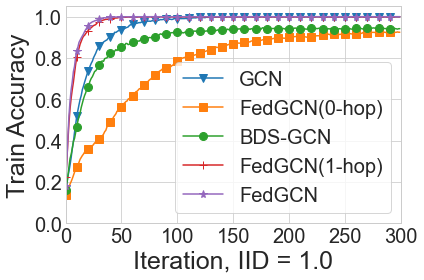

In [69]:
plt.style.use('seaborn-whitegrid')


file_name = "real_cora_IID_centralized_GCN_iter_300"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
print('Central')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

plt.plot(train_acc.keys(), train_acc.values(), 'v-', label = 'GCN', markevery=10, markersize=8)

file_name = "real_cora_IID_1.0_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), 's-', label = 'FedGCN(0-hop)', markevery=10, markersize=8)
print('0hop')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

file_name = "real_cora_IID_1.0_1hop_BDS_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), 'o-', label = 'BDS-GCN', markevery=10, markersize=8)
print('BDS')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

file_name = "real_cora_IID_1.0_1hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), '+-', label = 'FedGCN(1-hop)', markevery=10, markersize=8)
print('1hop')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

file_name = "real_cora_IID_1.0_2hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), '*-', label = 'FedGCN', markevery=10, markersize=8)
print('2hop')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# naming the x axis
plt.xlabel('Iteration, IID = 1.0', fontsize=25)
# naming the y axis
plt.ylabel('Train Accuracy', fontsize=25)

plt.ylim(0, 1.05) 
plt.xlim(0, 300) 
plt.legend(fontsize=20, frameon=True, loc='lower right')
#plt.title("Compare, IID, epoch = 3")
#plt.show()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.savefig("train_acc_IID_1.0.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


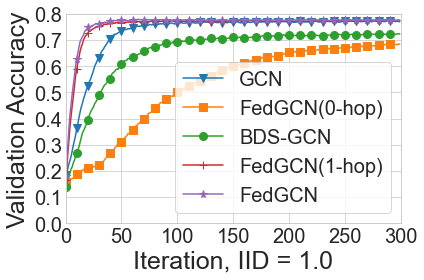

In [70]:
plt.style.use('seaborn-whitegrid')


file_name = "real_cora_IID_centralized_GCN_iter_300"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)


plt.plot(val_acc.keys(), val_acc.values(), 'v-', label = 'GCN', markevery=10, markersize=8)

file_name = "real_cora_IID_1.0_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), 's-', label = 'FedGCN(0-hop)', markevery=10, markersize=8)

file_name = "real_cora_IID_1.0_1hop_BDS_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), 'o-', label = 'BDS-GCN', markevery=10, markersize=8)


file_name = "real_cora_IID_1.0_1hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), '+-', label = 'FedGCN(1-hop)', markevery=10, markersize=8)

file_name = "real_cora_IID_1.0_2hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), '*-', label = 'FedGCN', markevery=10, markersize=8)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# naming the x axis
plt.xlabel('Iteration, IID = 1.0', fontsize=25)
# naming the y axis
plt.ylabel('Validation Accuracy', fontsize=25)

plt.ylim(0, 0.8) 
plt.xlim(0, 300) 
plt.legend(fontsize=20, frameon=True, loc='lower right')
#plt.title("Compare, IID, epoch = 3")
#plt.show()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.savefig("test_acc_IID_1.0.eps", format='eps')

Central
1.0 0.7700000000000001 0.8013
97 80
0hop
0.9442857142857143 0.7382000000000001 0.7475
232 209
BDS
0.8950000000000001 0.7849999999999999 0.7790999999999999
94 75
1hop
1.0 0.7726 0.8029999999999999
60 56
2hop
1.0 0.7750000000000001 0.8012
42 47


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


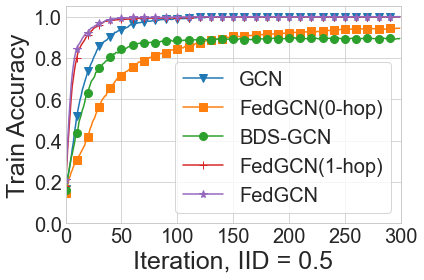

In [71]:
plt.style.use('seaborn-whitegrid')


file_name = "real_cora_IID_centralized_GCN_iter_300"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
print('Central')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

plt.plot(train_acc.keys(), train_acc.values(), 'v-', label = 'GCN', markevery=10, markersize=8)

file_name = "real_cora_IID_0.5_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), 's-', label = 'FedGCN(0-hop)', markevery=10, markersize=8)
print('0hop')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

file_name = "real_cora_IID_0.5_1hop_BDS_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), 'o-', label = 'BDS-GCN', markevery=10, markersize=8)
print('BDS')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

file_name = "real_cora_IID_0.5_1hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), '+-', label = 'FedGCN(1-hop)', markevery=10, markersize=8)
print('1hop')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

file_name = "real_cora_IID_0.5_2hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), '*-', label = 'FedGCN', markevery=10, markersize=8)
print('2hop')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# naming the x axis
plt.xlabel('Iteration, IID = 0.5', fontsize=25)
# naming the y axis
plt.ylabel('Train Accuracy', fontsize=25)

plt.ylim(0, 1.05) 
plt.xlim(0, 300) 
plt.legend(fontsize=20, frameon=True, loc='lower right')
#plt.title("Compare, IID, epoch = 3")
#plt.show()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.savefig("train_acc_IID_0.5.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


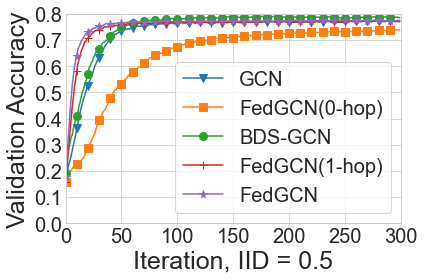

In [72]:
plt.style.use('seaborn-whitegrid')


file_name = "real_cora_IID_centralized_GCN_iter_300"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)


plt.plot(val_acc.keys(), val_acc.values(), 'v-', label = 'GCN', markevery=10, markersize=8)

file_name = "real_cora_IID_0.5_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), 's-', label = 'FedGCN(0-hop)', markevery=10, markersize=8)

file_name = "real_cora_IID_0.5_1hop_BDS_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), 'o-', label = 'BDS-GCN', markevery=10, markersize=8)


file_name = "real_cora_IID_0.5_1hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), '+-', label = 'FedGCN(1-hop)', markevery=10, markersize=8)

file_name = "real_cora_IID_0.5_2hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), '*-', label = 'FedGCN', markevery=10, markersize=8)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# naming the x axis
plt.xlabel('Iteration, IID = 0.5', fontsize=25)
# naming the y axis
plt.ylabel('Validation Accuracy', fontsize=25)

plt.ylim(0, 0.8) 
plt.xlim(0, 300) 
plt.legend(fontsize=20, frameon=True, loc='lower right')
#plt.title("Compare, IID, epoch = 3")
#plt.show()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.savefig("test_acc_IID_0.5.eps", format='eps')

Central
1.0 0.7700000000000001 0.8013
97 80
0hop
0.9842857142857143 0.786 0.8163
206 87
BDS
0.9492857142857144 0.7884 0.8078999999999998
180 64
1hop
1.0 0.7821999999999999 0.8097
76 62
2hop
1.0 0.7734000000000001 0.7966
81 77


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


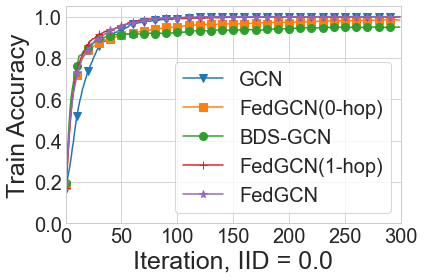

In [73]:
plt.style.use('seaborn-whitegrid')


file_name = "real_cora_IID_centralized_GCN_iter_300"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
print('Central')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

plt.plot(train_acc.keys(), train_acc.values(), 'v-', label = 'GCN', markevery=10, markersize=8)

file_name = "real_cora_IID_0.0_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), 's-', label = 'FedGCN(0-hop)', markevery=10, markersize=8)
print('0hop')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

file_name = "real_cora_IID_0.0_1hop_BDS_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), 'o-', label = 'BDS-GCN', markevery=10, markersize=8)
print('BDS')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

file_name = "real_cora_IID_0.0_1hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), '+-', label = 'FedGCN(1-hop)', markevery=10, markersize=8)
print('1hop')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

file_name = "real_cora_IID_0.0_2hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(train_acc.keys(), train_acc.values(), '*-', label = 'FedGCN', markevery=10, markersize=8)
print('2hop')
print(train_acc[299], val_acc[299], test_acc)
print(get_convergence_time(train_acc), get_convergence_time(val_acc))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# naming the x axis
plt.xlabel('Iteration, IID = 0.0', fontsize=25)
# naming the y axis
plt.ylabel('Train Accuracy', fontsize=25)

plt.ylim(0, 1.05) 
plt.xlim(0, 300) 
plt.legend(fontsize=20, frameon=True, loc='lower right')
#plt.title("Compare, IID, epoch = 3")
#plt.show()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.savefig("train_acc_IID_0.0.eps", format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


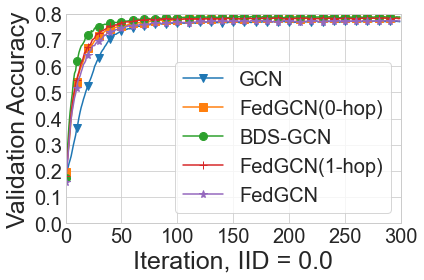

In [74]:
plt.style.use('seaborn-whitegrid')


file_name = "real_cora_IID_centralized_GCN_iter_300"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)


plt.plot(val_acc.keys(), val_acc.values(), 'v-', label = 'GCN', markevery=10, markersize=8)

file_name = "real_cora_IID_0.0_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), 's-', label = 'FedGCN(0-hop)', markevery=10, markersize=8)

file_name = "real_cora_IID_0.0_1hop_BDS_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), 'o-', label = 'BDS-GCN', markevery=10, markersize=8)


file_name = "real_cora_IID_0.0_1hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), '+-', label = 'FedGCN(1-hop)', markevery=10, markersize=8)

file_name = "real_cora_IID_0.0_2hop_Block_federated_GCN_iter_300_epoch_3_device_num_7"
train_loss, train_acc, val_loss, val_acc, test_loss, test_acc = get_data(file_name)
plt.plot(val_acc.keys(), val_acc.values(), '*-', label = 'FedGCN', markevery=10, markersize=8)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# naming the x axis
plt.xlabel('Iteration, IID = 0.0', fontsize=25)
# naming the y axis
plt.ylabel('Validation Accuracy', fontsize=25)

plt.ylim(0, 0.8) 
plt.xlim(0, 300) 
plt.legend(fontsize=20, frameon=True, loc='lower right')
#plt.title("Compare, IID, epoch = 3")
#plt.show()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.savefig("test_acc_IID_0.0.eps", format='eps')